<font size= 3, style="text-align:justify">

Zain Elsell & Avery Fulton\
March 17, 2023\
Applied Regression 

<p style="text-align: center;">Fraud Detection Paper 1</p>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As stated in our project proposal our goal is to try to create a logistic regression fraud detection algorithm from the IEEE fraud-detection data set located on Kagel. The primary objectives of this paper are to analyze the response variable in both problem and mathematical contexts, evaluate potential predictor variables, identify and address inconsistencies or outliers, establish confidence intervals for some predictor variables, and determine high correlation coefficients between them.    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We can begin this project by first importing the required dependencies that we are going through and then performing some, rudimentary data wrangling. Initially, what we are doing is importing the data for the train and test sets that were given to us then merging the identity data with the transaction data for both our train and test sets on the TransactionID column so we can use only two .csv documents as opposed to the given four. The next step in the wrangling process is taking a consistent sample of 10% of the given data; the primary motivation behind this choice was to reduce the compute time for a select few and manipulations operations, as the initial data set contains 590,540 data points and 434 possible features. Note that we will run the created model on the overall data set to consistently represent the performance in the context of a larger sample. 
    

    
 </font>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
import scipy.stats as sci
import sys, os
from sys import platform

In [8]:

#all of the stuff this doing is litearlly just making everything cross compatiable depending on who and what system they are working on along wiht data wrangling

RED   = "\033[1;31m"  
BLUE  = "\033[1;34m"
RESET = "\033[0;0m"
BOLD    = "\033[;1m"
REVERSE = "\033[;7m"

np.random.seed(120)

#setting path  
if platform == "win32" and os.getlogin() == 'zaine':
    data_path = 'C:/Users/zaine/OneDrive/Desktop/School/STAT/Reg_Proj/ieee-fraud-detection/'
    ScaleData = 0
elif platform == "win32" and os.getlogin() == 'Avery':
    data_path = "C:/Users/Avery/Desktop/Applied_Regression/Datasets for reg/"
    ScaleData = 1
elif platform == "darwin":
    data_path = "~/Desktop/School/Reg_Proj/Regression_proj/ds_project"
    ScaleData = 2


#a bunch of logic related to what system we are on
if(ScaleData == 0):
    train_ident = pd.read_csv(data_path + 'train_identity.csv')
    test_ident = pd.read_csv(data_path + 'test_identity.csv')
    train_transaction = pd.read_csv(data_path + 'train_transaction.csv')
    test_transaction = pd.read_csv(data_path + 'test_transaction.csv')
    #Merging our 4 data sets into 2:
    train = train_transaction.merge(train_ident, on='TransactionID', how='left')
    test = test_transaction.merge(test_ident, on='TransactionID', how='left')
    
    cur_working = os.path.dirname(os.getcwd()) 
    fptrain = str(cur_working) + "\dsProject\\train_sample.csv"
    fptest = str(cur_working) + "\dsProject\\test_sample.csv"

    train_sample = pd.read_csv(fptrain)
    test_sample = pd.read_csv(fptest)

    
elif(ScaleData == 1):
    train = pd.read_csv(data_path + "/train_sample.csv") #make this exact path to the csv
    test = pd.read_csv(data_path + "/test_sample.csv") #make this exact path to the csv
    train_sample = pd.read_csv(data_path + "/train_sample.csv") #just to prevent edge cases later 
    test_sample = pd.read_csv(data_path + "/train_sample.csv")
elif(ScaleData == 2):
    train = pd.read_csv(data_path + "/train_sample.csv")
    test = pd.read_csv(data_path + "/test_sample.csv")
    train_sample = pd.read_csv(data_path + "/train_sample.csv")
    test_sample = pd.read_csv(data_path + "/train_sample.csv")
else:
    sys.stdout.write(RED)
    error_code= input("Error: Data path not found do you want to regenearte the train and test sets in the current working directory?[y/n]: ")
    if error_code == 'y':
        print("Warning: Data path not found regenerating data in current script working directory!")
        sys.stdout.write(RESET)
        print("\n==============================================================")
        train_ident = pd.read_csv(data_path + 'train_identity.csv')
        test_ident = pd.read_csv(data_path + 'test_identity.csv')
        train_transaction = pd.read_csv(data_path + 'train_transaction.csv')
        test_transaction = pd.read_csv(data_path + 'test_transaction.csv')
        #Merging our 4 data sets into 2:
        print("Merging Data")
        train = train_transaction.merge(train_ident, on='TransactionID', how='left')
        test = test_transaction.merge(test_ident, on='TransactionID', how='left')
        print("Sampling Data")
        train_sample = train.sample(frac = 0.1, random_state = 120)
        test_sample = test.sample(frac = 0.1, random_state=120)
        cur_working = os.path.dirname(os.getcwd()) 
        print("Exporting Data To Git Path:"+ str(cur_working))
        fptrain = str(cur_working) + "\dsProject\\train_sample.csv"
        fptest = str(cur_working) + "\dsProject\\test_sample.csv"
        print("Generating csvs @:\n" + fptrain+"\n"+ fptest )
        train_sample.to_csv(fptrain)
        test_sample.to_csv(fptest)
        print("Setting Pandas Objects at above csv directories")
        train = pd.read_csv(fptrain)
        test = pd.read_csv(fptest)
        sys.stdout.write(BLUE)
        print("\n Process Complete")
        sys.stdout.write(RESET)
        print("==============================================================")
    elif error_code == 'n':
        print("Fatal Error Rerun Chunk")
    else:
        sys.exit(0)
        


Merging Data
Sampling Data
Exporting Data To Git Path:c:\Users\zaine\OneDrive\Desktop\School\STAT\Reg_Proj\Regression_proj
Generating csvs @:
c:\Users\zaine\OneDrive\Desktop\School\STAT\Reg_Proj\Regression_proj\dsProject\train_sample.csv
c:\Users\zaine\OneDrive\Desktop\School\STAT\Reg_Proj\Regression_proj\dsProject\test_sample.csv
Setting Pandas Objects at above csv directories

 Process Complete


0.034967995394046124
0.035169000000000006
3.5172439e-05


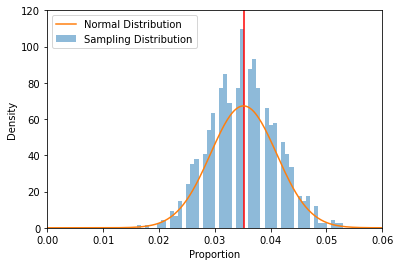

In [9]:
propFraud = train['isFraud'].mean()
print(propFraud)

#constructing a sampling distribution.
p = propFraud
n = 1000 
#gen 1k samples of size 1000
samples = np.random.binomial(n,p, 1000)
sample_props = samples/n

plt.hist(sample_props, bins=50, density=True, alpha=0.5, label='Sampling Distribution')
mu = np.mean(sample_props)
print(mu)
var = np.var(sample_props)
print(var)
sigma = np.std(sample_props)

x = np.linspace(0, 0.28, 1000)
norm = sci.norm.pdf(x, loc=mu, scale=sigma)
plt.axis([0, .06, 0, 120])
plt.axvline(x=mu, color='r')
plt.plot(x, norm, label='Normal Distribution')
plt.xlabel('Proportion')
plt.ylabel('Density')
plt.legend()
plt.show()

<font size= 3, style="text-align:justify">
     
$$\text{Let } F := \text{A transaction is fraudelent}$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Our response varaible is the value of the "isFraud" within the data set, in order to find the distribution of our response varaible we first calculated the proportion of fraudelent transactions to non fraudlent ones which a approximate value of 3.499%, we then construct a sampling distribution using a binomial random variable using the previously calculated proportion, and then finally ploted the randomly generated samples and compare it to a normal distribution centered at the mean of sampled proporitions, with standard deviation. Comparing the simulated values to the normal distribution then gives the final result that, $F \sim\text{Normal}(\mu = 0.35213, \sigma^2 = 3.4923631 \cdot 10^{-5})$ (using the large data set) by the central limit theorm. Some of the clear implications of finding is that likelyhood of fraud is not common outcome of a transaction. Reflecting from the the finicial sector context this is plausible the overall proporition of fraudelent transactions, is signicantly lower then the proporition authorized ones. 
 
 </font>

In [6]:
train_corr = train_sample.corr()

In [7]:
# Extract the correlations as a DataFrame
abscorr = train_corr.abs()
# Filter the DataFrame to show only correlations greater than 0.7 and not equal to 1
high_corr = abscorr[(abscorr > 0.7) & (abscorr != 1)]
# Print the high correlation pairs
high_corr_dict = (high_corr.stack().drop_duplicates()).to_dict()
#high_corr_dict.keys()
corrs = {k:v for k, v in high_corr_dict.items() if 'C1' in k}
corrs

{('C1', 'C2'): 0.9960255814335263,
 ('C1', 'C4'): 0.9720331304828849,
 ('C1', 'C6'): 0.9837587217717109,
 ('C1', 'C7'): 0.9379304598092051,
 ('C1', 'C8'): 0.9726319845008362,
 ('C1', 'C10'): 0.9649521721724863,
 ('C1', 'C11'): 0.9970126813477574,
 ('C1', 'C12'): 0.9393597650111772,
 ('C1', 'C13'): 0.7926063809278694,
 ('C1', 'C14'): 0.9559284351187977}